In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse as sp_sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/gdrive/My Drive/project/10000.csv',encoding='ISO-8859-1')
# data['tags'] = data['tags'].apply(literal_eval)
# x = data.nutrition
x = data.drop(["name","id","minutes","contributor_id","nutrition","submitted","steps","tags","description","ingredients"],axis = 1)
y = data.tags


In [3]:
print(x)
print(x.shape)

      n_steps  n_ingredients  ...  stated_fat  total_carbonhydrate
0          13              1  ...           0                    1
1           2              1  ...           1                    8
2           3              1  ...          37                    8
3           6              1  ...         137                    1
4           9              1  ...           7                    0
...       ...            ...  ...         ...                  ...
9995        2              4  ...          89                   22
9996        3              4  ...          45                   15
9997        6              4  ...          20                   22
9998        9              4  ...           6                    4
9999        2              4  ...          12                   18

[10000 rows x 9 columns]
(10000, 9)


In [4]:
print(y)

0       ['time-to-make','course','preparation','low-pr...
1       ['60-minutes-or-less','time-to-make','main-ing...
2       ['15-minutes-or-less','time-to-make','course',...
3       ['weeknight','time-to-make','cuisine','prepara...
4       ['15-minutes-or-less','time-to-make','course',...
                              ...                        
9995    ['15-minutes-or-less','time-to-make','course',...
9996    ['15-minutes-or-less','time-to-make','course',...
9997    ['15-minutes-or-less','time-to-make','course',...
9998    ['30-minutes-or-less','time-to-make','course',...
9999    ['15-minutes-or-less','time-to-make','course',...
Name: tags, Length: 10000, dtype: object


In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y= le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [6]:
print(y)

[8734 7356 3363 ... 2178 5082 2640]


In [7]:
print(y_train)

[3314 7092 7604 ... 7473 6758 1866]


In [8]:
print(X_train)

      n_steps  n_ingredients  ...  stated_fat  total_carbonhydrate
502         3              2  ...           0                    4
3359        9              3  ...         646                   97
6622       17              3  ...           0                    2
5646        2              3  ...           0                    4
2623        1              3  ...          37                    4
...       ...            ...  ...         ...                  ...
9225        6              4  ...           3                    3
4859        6              3  ...           0                   18
3264        9              3  ...          85                   12
9845        7              4  ...          55                   10
2732        2              3  ...          35                   14

[6666 rows x 9 columns]


 **K-NN**

In [9]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier


# Declare an of the KNN classifier class with the value with neighbors.
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model with training data and target values
knn.fit(X_train,y_train)


# Prints the data provided
print(x)

# Store predicted class labels of X
prediction = knn.predict(x)

# Prints the predicted class labels of X
print(prediction)

      n_steps  n_ingredients  ...  stated_fat  total_carbonhydrate
0          13              1  ...           0                    1
1           2              1  ...           1                    8
2           3              1  ...          37                    8
3           6              1  ...         137                    1
4           9              1  ...           7                    0
...       ...            ...  ...         ...                  ...
9995        2              4  ...          89                   22
9996        3              4  ...          45                   15
9997        6              4  ...          20                   22
9998        9              4  ...           6                    4
9999        2              4  ...          12                   18

[10000 rows x 9 columns]
[ 876 5507 2312 ... 2178 3210  531]


In [10]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [11]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 98.87488748874887 % and k = [1]


In [12]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 0.8998200359928014 % and k = [14]


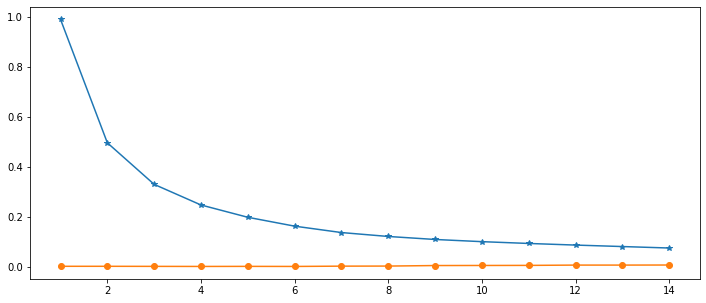

In [13]:
plt.figure(figsize=(12,5))
plt.plot(range(1,15),train_scores,marker='*',label='Train Score')
plt.plot(range(1,15),test_scores,marker='o',label='Test Score')

**Decision Tree**

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=9, max_features=8, random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.092
Accuracy on test set: 0.010


In [22]:
y_pred = dt.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
#Adjust the decision tree parameters to improve the performance.Write your code below.

# add class_weight as balanced so that training accuracy is close to testing accuracy
# reference:uses the value of y to automatically adapt to the weight, 
# and is inversely proportional to the frequency of the class in the input data

dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=16,random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
y_pred = dt.predict(X_test)

Accuracy on training set: 0.989
Accuracy on test set: 0.004


**NN**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [27]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 8.76588006
Iteration 2, loss = 8.72636324
Iteration 3, loss = 8.67051788
Iteration 4, loss = 8.56947303
Iteration 5, loss = 8.41771871
Iteration 6, loss = 8.22207702
Iteration 7, loss = 7.99922335
Iteration 8, loss = 7.77050928
Iteration 9, loss = 7.55563866
Iteration 10, loss = 7.36371872
Iteration 11, loss = 7.19359184
Iteration 12, loss = 7.03731563
Iteration 13, loss = 6.89361339
Iteration 14, loss = 6.75999547
Iteration 15, loss = 6.63434118
Iteration 16, loss = 6.51924122
Iteration 17, loss = 6.40780744
Iteration 18, loss = 6.30483441
Iteration 19, loss = 6.20519837
Iteration 20, loss = 6.11322776
Iteration 21, loss = 6.02357867
Iteration 22, loss = 5.93966272
Iteration 23, loss = 5.85938155
Iteration 24, loss = 5.77989341
Iteration 25, loss = 5.70740934
Iteration 26, loss = 5.63919895
Iteration 27, loss = 5.56905423
Iteration 28, loss = 5.50704607
Iteration 29, loss = 5.44580012
Iteration 30, loss = 5.38558684
Iteration 31, loss = 5.32836883
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [30]:
predictions = mlp.predict(X_test)

from sklearn import metrics 
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.007798440311937612
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          25       0.00      0.00      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.676
Accuracy on test set: 0.008


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

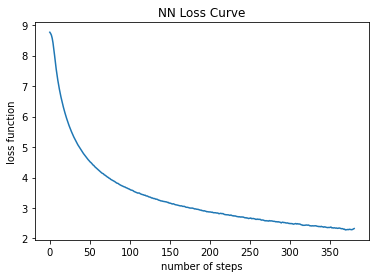

In [35]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [36]:
(mlp.intercepts_[0]).shape

(10,)

In [37]:
(mlp.coefs_[0]).shape

(9, 10)

In [38]:
mlp.intercepts_[0]

array([1.26802362, 1.75471373, 2.54387647, 2.2704339 , 2.15818834,
       3.17111837, 3.9178915 , 3.28998651, 4.28226024, 2.13784049])

In [39]:
mlp.coefs_[0]

array([[-2.76932445e+00,  3.61241064e+00, -3.54268046e+00,
        -2.32039579e+00, -4.07075065e+00,  4.22348162e-01,
         3.24340644e+00,  1.73111806e+00, -3.07065686e-01,
         3.05859072e+00],
       [ 2.86151658e+00, -1.55930237e+00,  9.56230213e-01,
         1.26724103e+00, -2.00574444e+00,  2.00515560e+00,
         1.93532372e+00, -1.85547064e+00, -1.77743743e+00,
         2.05521984e+00],
       [ 3.96421918e+00, -1.62308720e+00,  2.94356723e+00,
        -1.87003063e+00, -3.62710643e+00,  2.51768614e+00,
        -7.22087124e-01,  9.39750790e-01,  2.88746138e+00,
        -2.21806149e+00],
       [-5.94547594e-01, -4.62470060e+00,  1.82673053e+00,
         1.53151886e+00, -4.20504231e+00,  3.89056742e+00,
        -8.45039024e-01,  6.20961053e-01, -9.66932357e-01,
        -7.92552443e-01],
       [ 2.42399416e+00, -2.94357479e+00, -3.89058784e+00,
        -2.79380083e+00,  2.61697542e+00,  1.74473275e-01,
         1.66443996e+00, -1.66944435e+00, -9.17195796e-01,
         1.

In [40]:
#Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.

mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train) 

predictions = mlp.predict(X_test)  

Iteration 1, loss = 8.77542423
Iteration 2, loss = 8.74338301
Iteration 3, loss = 8.72314305
Iteration 4, loss = 8.68790419
Iteration 5, loss = 8.63470846
Iteration 6, loss = 8.56516775
Iteration 7, loss = 8.48568300
Iteration 8, loss = 8.40242101
Iteration 9, loss = 8.32295479
Iteration 10, loss = 8.25174918
Iteration 11, loss = 8.18597624
Iteration 12, loss = 8.12492048
Iteration 13, loss = 8.06745680
Iteration 14, loss = 8.01256956
Iteration 15, loss = 7.95927967
Iteration 16, loss = 7.90726678
Iteration 17, loss = 7.85563019
Iteration 18, loss = 7.80532044
Iteration 19, loss = 7.75558156
Iteration 20, loss = 7.70633795
Iteration 21, loss = 7.65664653
Iteration 22, loss = 7.60699886
Iteration 23, loss = 7.55631234
Iteration 24, loss = 7.50477323
Iteration 25, loss = 7.45115904
Iteration 26, loss = 7.39619590
Iteration 27, loss = 7.33853111
Iteration 28, loss = 7.28137789
Iteration 29, loss = 7.22223996
Iteration 30, loss = 7.16341185
Iteration 31, loss = 7.10467113
Iteration 32, los

In [44]:
print("Accuracy", metrics.accuracy_score(y_test.astype('int'), predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

Accuracy 0.010197960407918417
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
